# Decisiones Bajo Incertidumbre en las Organizaciones
---
#### Denis Alexander Zuluaga Quintero
dazuluag@unal.edu.co   
Universidad Nacional de Colombia, Sede Medellín  
Facultad de Minas  
Medellín, Colombia

## Tarea 13 - Simulación de Montecarlo en R
---
**Variable de decisión:** ¿cuántos sartenes especiales comprar?

**Variables ciertas:**
- Costo de sartenes especiales: 22 USD c/u
- Costo de sartenes comunes de cobre: 32 USD c/u
- Precio de venta de los sartenes: 35 USD c/u

**Variables con incertidumbre:**
- La **demanda** sigue una normal con promedio 100 y desviación 25. Redondee esta variable a números enteros)
- El **precio de venta a la cadena de descuento** sigue una distribución lognormal, con 𝜇  = 2.7 y 𝜎 = 0.008. (Esto implica que la media de la distribución sea de 15 USD y desviación estándar de 2 USD). Redondee esta variable a dos decimales.

**Variable de salida:** Utilidades del ejercicio.

**Simulación:** Haga una Simulación de Montecarlo en R, en donde suponga la compra de 95, 110 y 115 sartenes. Realice 1000 iteraciones por simulación y obtenga, para cada simulación, un histograma, el valor esperado, la desviación estándar, el mínimo, el máximo, los percentiles 5 y 95 y la probabilidad de que las utilidades sean mayores que 0.

**Entregable:**
- Código R documentado con la implementación de la simulación de Montecarlo.
- Un documento donde presente los resultados y análisis de cada simulación. ¿Cuál decisión es la ganadora según cada criterio de incertidumbre? (Valor esperado, desviación estándar, maximin, maximax, 𝛼 −fractil y 𝛽 −robustez). (𝛼 = 0.05; 𝛽 = 0)

**Fecha de entrega:**
Viernes 25 de mayo, 2:00 pm (Minaslap)

### 1. Importamos las librerias requeridas
---

In [0]:
library(sets)
require(graphics)

### 2. Definimos las variables ciertas
---
Las variables ciertas las podemos declarar como valores constantes o fijas para la solución del problema.

In [0]:
costo.especiales <- 22 # Costo de sarténes especiale 
costo.comunes <- 32    # Costo de sarténes comunes de cobre
precio.venta <- 35     # Precio de venta de los sarténes
cantidad.iter <- 1000  # Cantidad de iteraciones de simulación

### 3. Definimos las variables inciertas
---
Definimos variables reutilizables en el programa para calcular las variables inciertas a partir de las distribuciones especificadas para cada una. Generamos tantos valores como iteraciones de simulación se requieren.

In [0]:
# Demanda (cantidad de sarténes que se venderán en la promoción)
demanda <- round(rnorm(n = cantidad.iter, 
                       mean = 100, 
                       sd = 25), 0)

# Precio de venta para la cadena de descuento, en caso de que 
# no se vendan todos los sarténes
precios.cadena <- round(rlnorm(n = cantidad.iter, 
                               meanlog = 2.7, 
                               sdlog = 0.008), 2)

### 4. Definimos las variables de salida
---
Esta variable corresponde a la **utilidad neta** (variable objetivo) producida por las ventas de sarténes especiales y comunes (si es del caso) en un ejercicio de promoción que realizará "El Roble".

In [0]:
calcular.utilidad <- function(cantidad.sartenes, iteracion.sartenes) {
    # Cantidad de demanda de la iteración
    cantidad.demanda <- demanda[iteracion.sartenes]
    # Precio venta cadena descuento de la iteración
    precio.cadena <- precios.cadena[iteracion.sartenes]
    # Diferencia sarténes a la venta y demanda
    cantidad.diferencia <- cantidad.sartenes - cantidad.demanda
    # Cantidad de sarténes comunes de cobre que se venden
    cantidad.comunes <- ifelse(cantidad.diferencia < 0, abs(cantidad.diferencia), 0)
    # Cantidad de sarténes que se venden a la cadena de descuento
    cantidad.cadena <- ifelse(cantidad.diferencia > 0, cantidad.diferencia, 0)
    # Costo total de los sarténes especiales
    costo.total.especiales <- costo.especiales * cantidad.especiales
    # Costo total de sarténes comunes de cobre que se venden
    costo.total.comunes <- costo.comunes * cantidad.comunes
    # Valor de las ventas totales de sarténes en promoción
    venta.total.promocion <- cantidad.demanda * precio.venta
    # Utilidad total venta de sarténes en la promoción
    utilidad.promocion <- venta.total.promocion - costo.total.especiales - costo.total.comunes 
    # Utilidad total venta de sarténes a la cadena de descuento
    utilidad.cadena <- precio.cadena * cantidad.cadena
    # Utilidad neta de las ventas totales
    return(utilidad.promocion + utilidad.cadena)
}

### 5. Ejecutamos la simulación de utilidad
Este calculo se realizará para la cantidad de iteraciones posible (1000) utilizando 3 cantidades de sarténes a vender en la promoción **(variable objetivo)**.

In [0]:
# Calculamos el valor de la utilidad para 1000 iteraciones de simulación
# y 3 cantidades de sarténes diferentes
cantidad.sartenes <- c(95, 110, 115)
utilidad.sartenes <- c()
for(i in cantidad.sartenes) {
    # Lista para almacenar las utilidades de un ciclo de iteraciones
    utilidad.total <- c()
    # Cantidad de sarténes especiales a la venta
    cantidad.especiales <- i
    # Ciclo sobre todas las iteraciones posibles
    for(j in 1:cantidad.iter) {
        # Utilidad neta de las ventas totales
        utilidad.total <- c(utilidad.total, calcular.utilidad(i, j))
    }
    # Consolida todos los valores de utilidad para todas las iteraciones
    utilidad.sartenes <- c(utilidad.sartenes, utilidad.total)
}

### 6. Generamos los reportes resultado
---
Realizamos en primer lugar el reporte estadístico donde calculamos medias, desviaciones estándar, valores mínimos, máximos, percentiles 5% y 95%, y la probabilidad de que las utilidades sean mayores o iguales que 0.

Cantidad,Promedios,Desviaciones,Maximos,Minimos,Percentiles.5,Percentiles.95,Probabilidades.0
95,1126.357,272.0916,1514,-141.32,532.1125,1364,0.998
110,1135.476,361.2010,1664,-249.92,424.9345,1514,0.993
115,1125.076,386.6759,1714,-286.12,387.8305,1564,0.989


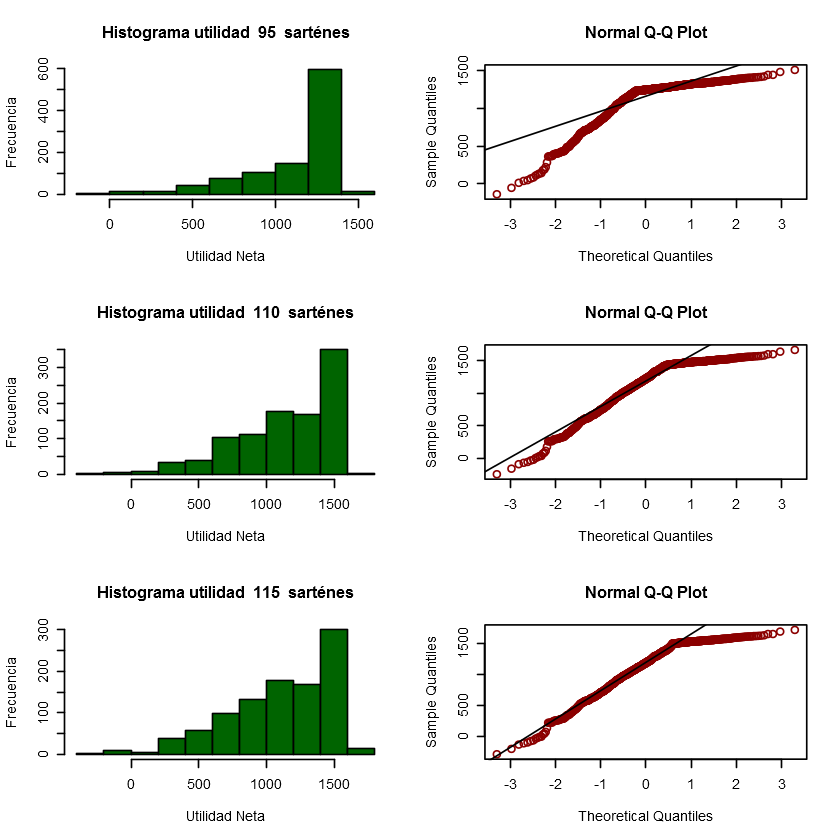

In [0]:
# Declaramos variables para controlar la extracción de los valores de utilidad
# considerando que estos se encuentran integrados en el vector utilidad.sartenes
n <- 1; m <- 1000
# Declaramos vector para almacenar los 3 valores promedios (medias)
promedios <- c()
# Declaramos vector para almacenar los 3 valores de desviación estándar
desviaciones <- c()
# Declaramos vector para almacenar los 3 valores mínimos
minimos <- c()
# Declaramos vector para almacenar los 3 valores máximos
maximos <- c()
# Declaramos vector para almacenar los 3 valores percentiles 5%
percentiles.05 <- c()
# Declaramos vector para almacenar los 3 valores percentiles 95%
percentiles.95 <- c()
# Declaramos vector para almacenar los 3 valores probabilidad de que las utilidades
# sean mayores o iguales que 0
probabilidades.0 <- c()
# La siguiente sentencia permite generar una grilla 3x2 de gráficos
par(mfrow=c(3,2))
# Ciclo para iterar los calculos sobre las 3 cantidades de sarténes
for(i in 1:length(cantidad.sartenes)) {
    # Valor de la utilidad para la cantidad de sarténes i
    utilidad <- utilidad.sartenes[n:m]
    # Gráfico histograma de las utilidades para la cantidad de sarténes i
    hist(utilidad, col = "darkgreen",
         main = paste("Histograma utilidad ", cantidad.sartenes[i], " sarténes"),
         xlab = "Utilidad Neta",
         ylab = "Frecuencia")
    # Gráficos de normalidad de las utilidades para la cantidad de sarténes i
    qqnorm(utilidad, col = "darkred")
    qqline(utilidad)
    # Valor promedio (media) de las utilidades para la cantidad de sarténes i
    promedios <- c(promedios, mean(utilidad))
    # Valor desviación estándar de las utilidades para la cantidad de sarténes i
    desviaciones <- c(desviaciones, sd(utilidad))
    # Valor mínimo de las utilidades para la cantidad de sarténes i
    minimos <- c(minimos, min(utilidad))
    # Valor máximo de las utilidades para la cantidad de sarténes i
    maximos <- c(maximos, max(utilidad))
    # Valor percentil 5% y 95% de las utilidades para la cantidad de sarténes i
    qu <- quantile(utilidad, probs = c(0.05, 0.95))
    percentiles.05 <-c(percentiles.05, qu[[1]])
    percentiles.95 <-c(percentiles.95, qu[[2]])
    # Valor probabilidad >= 0 de las utilidades para la cantidad de sarténes i
    probabilidades.0 <- c(probabilidades.0, sum(utilidad >= 0) / cantidad.iter)
    # Valores que controlan las iteraciones sobre las 1000 simulaciones de la cantidad de sarténes i
    n <- (1000 * i) + 1
    m <- 1000 * (i + 1)
}
# Data Frame que permite reportar los estadísticos anteriormente calculados
resultados <- data.frame(Cantidad=cantidad.sartenes,
                         Promedios=promedios,
                         Desviaciones=desviaciones,
                         Maximos=maximos,
                         Minimos=minimos,
                         Percentiles.5=percentiles.05,
                         Percentiles.95=percentiles.95,
                         Probabilidades.0=probabilidades.0)
# Presenta la tabla de resultados con los estadísticos anteriormente calculados
resultados

Los reportes anteriores permiten intuir que la alternativa de 95 sarténes tendría el menor margen de ganancia esperada, mientras que la opción de 115 sarténes permitiría percibir una mayor utilidad. Sin embargo, esta última representa la alternativa con mayores riesgos, dado que tiene la más alta volatilidad (desviación estándar). Para una estrategia pesimista la alternativa de 95 sarténes es perfecta, mientras que una estrategia optimista seleccionaría 115 sarténes.

Notamos en todas las gráficas de histográma un sesgo a la izquierda evidenciando esto que las simulaciones para todos las catidades de sarténes a vender en la promoción concentran la mayor cantidad de valores junto a los valores más altos y cercanas a la media, indicando que hay mayor probabilidad de generar ganancias, antes que perdidas.

### 7. Analizamos los resultados y concluímos
---
Llevamos a cabo el cálculo de los criterios de incertidumbre que nos permitiran tomar una decisión de cual es la cantidad de sarténes a comprar para la promoción en "El Roble". Los criterios a calcular son:

- Valor esperado (Esperanza)
- Desviación estándar (Variabilidad)
- Maximin
- Maximax
- Alfa-fractil
- Beta-robustez

In [0]:
# Función que permite calcular el valor máximo retornando dicho valor con el índice en el vector
calcular.maximo <- function(data) {
    maximo <- min(data)
    indice <- 0
    for(i in 1:length(data)) {
        if(data[i] > maximo) {
            maximo <- data[i]
            indice <- i
        }
    }
    return(tuple(indice, maximo))
}
# Función que permite calcular el valor mínimo retornando dicho valor con el índice en el vector
calcular.minimo <- function(data) {
    minimo <- max(data)
    indice <- 0
    for(i in 1:length(data)) {
        if(data[i] < minimo) {
            minimo <- data[i]
            indice <- i
        }
    }
    return(tuple(indice, minimo))
}
# Las sentencias a continuación calculan los criterios de incertidumbre para todo el ejercicio
promedios.max <- calcular.maximo(resultados[["Promedios"]])
desviaciones.min <- calcular.minimo(resultados[["Desviaciones"]])
maximos.max <- calcular.maximo(resultados[["Maximos"]])
minimos.max <- calcular.maximo(resultados[["Minimos"]])
percentiles.5.max <- calcular.maximo(resultados[["Percentiles.5"]])
probabilidades.0.max <- calcular.maximo(resultados[["Probabilidades.0"]])
# Obtiene un vector con la lista de cantidades de sarténes estudiados
cantidades <- resultados[[1]]
# Genera un vector con los nombres de los criterios de incertidumbre para reporte final
criterios <- c("Valor esperado", "Desviación estándar", "Maximin", "Maximax", "Alpa-fractil", "Beta-robustez")
# Genera un vector con las cantidades de sarténes seleccionados según criterios de incertidumbre
seleccion <- c(cantidades[promedios.max[[1]]],
               cantidades[desviaciones.min[[1]]],
               cantidades[minimos.max[[1]]],
               cantidades[maximos.max[[1]]],
               cantidades[percentiles.5.max[[1]]],
               cantidades[probabilidades.0.max[[1]]])
# Genera un vector con los valores resultado según criterios de incertidumbre
resultado <- c(promedios.max[[2]],
               desviaciones.min[[2]],
               minimos.max[[2]],
               maximos.max[[2]],
               percentiles.5.max[[2]],
               probabilidades.0.max[[2]])
# Imprime tabla con los resultados obtenidos según los criterios de incertidumbre
data.frame(Criterios.Incertidumbre=criterios,
           Cantidad.Ganadora=seleccion,
           Valor.Resultado=resultado)

Criterios.Incertidumbre,Cantidad.Ganadora,Valor.Resultado
Valor esperado,110,1135.4755
Desviación estándar,95,272.0916
Maximin,95,-141.3200
Maximax,115,1714.0000
Alpa-fractil,95,532.1125
Beta-robustez,95,0.9980


**Conclusión:** En este caso se debe seleccionar la opción de comprar **95 sarténes**, ya que este valor nos permite obtener utilidades de la forma más moderada y con el menor riesgo. Tanto el **Alpha-fractil** como el **Beta-robustez** permiten intuir una estrategia con la mayor cobertura de riesgos a la organización. Considerando los resultados es sumamente riesgoso, por ejemplo, seleccionar la alternativa de comprar **115 sarténes**, aunque esta nos permita tener un mayor margen de utilidad es la alternativa que tiene mayor variabilidad y en un escenario de perdida la empresa experimentaría la peor utilidad.

Notemos que el valor de **Maximin** es negativo, lo cual nos indica que es un escenario donde la organización entraría en perdidas, sin embargo, indica al decisor que caracteriza el menor valor de perdida posible. Comparado esto con el **Beta-robustez** de **99.8%** indicando la más alta probabilidad de que las ganancias estén por encima de **0**, es decir, que se perciban utilidades a pesar de las incertidumbres generadas.